# **STQD6324 Data Management** 
# **P132829**
# **Assignment 1**

# **Explanatory Data Analysis of Unicorn Startup for Malaysia Benchmark**

# **Introduction**

The unicorn startup ecosystem in Malaysia has been steadily growing over the past few years, fueled by supportive government initiatives, a burgeoning tech-savvy population and a vibrant startup community. While Malaysia may not yet have as many unicorns (startups valued at over $1 billion) as some other Southeast Asian countries like Singapore and Indonesia, it has shown promising signs of development.

Some of the key aspects of the unicorn startup ecosystem in Malaysia are government support, tech infrastructure, growing investment landscape, startup hubs, talent pool, focus on key industries and regional expansion. The Malaysian government has been actively promoting entrepreneurship and innovation through ministry such as Ministry of Science, Technology and Innovation (MOSTI) through various programs and activities. These include grants, tax incentives and funding schemes aimed at supporting startups at different stages of their growth journey.

Cities like Kuala Lumpur and Penang have emerged as vibrant startups hubs, hosting a plethora of co-working spaces, incubators and accelerators. These hubs provide startups with access to mentorship, networking opportunities and resources. Malaysian startups with unicorn potential often have ambitions to expand beyond the domestic market and tap into the broader Southeast Asian region. This regional expansion strategy allows them to access larger markets and achieve significant scale.

Some notable unicorn startups that have emerged from Malaysia include Grab, the Southeast Asian super app offering ride-hailing, food delivery and financial services, and the e-commerce platform, GHL Systems. These success stories serve as inspiration for aspiring entrepreneurs and contribute to the overall vibrancy of the startup ecosystem in Malaysia.

For the purpose of this data exploration, the data on unicorn startups from around the world will be used as benchmark for Malaysia' future unicorn startup.

## **About the dataset**

This dataset can be downloaded from kaggle with url https://tinyurl.com/3vzykztt.

The feature description of the variables are as below:

| Feature       | Description                      |
|---------------|----------------------------------|
| Unnamed: 0    | Index                            |
| Company       | Company Name                     |
| Valuation ($B)| Valuation in billions of dollars |
| Date Joined   | Date established                 |
| Country       | Country of origin                |
| City          | City of origin                   |
| Industry      | Type of industry                 |
| Investor 1    | Investor 1                       |
| Investor 2    | Investor 2                       |
| Investor 3    | Investor 3                       |
| Investor 4    | Investor 4                       |

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

### **Data Exploratory**

The dataset can be downloded from the url and the heading of each variables as shown below.

In [105]:
# Read using the read_csv() function
df = pd.read_csv('C:/Users/kamar/STQD6324_P132829_Assignment1/Unicorn_Clean_V1.0.csv')
df.head(5)

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Investor 1,Investor 2,Investor 3,Investor 4
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,NaN
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,Khosla Ventures,LowercaseCapital,capitalG,NaN
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,Institutional Venture Partners,Sequoia Capital,General Atlantic,NaN
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,Sequoia Capital China,Blackbird Ventures,Matrix Partners,NaN


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      936 non-null    int64  
 1   Company         936 non-null    object 
 2   Valuation ($B)  936 non-null    float64
 3   Date Joined     936 non-null    object 
 4   Country         936 non-null    object 
 5   City            936 non-null    object 
 6   Industry        936 non-null    object 
 7   Investor 1      936 non-null    object 
 8   Investor 2      890 non-null    object 
 9   Investor 3      806 non-null    object 
 10  Investor 4      7 non-null      object 
dtypes: float64(1), int64(1), object(9)
memory usage: 80.6+ KB


### **Data Cleaning**

The data is cleaned by searching for the missing data (NA).

In [107]:
df.isna()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Investor 1,Investor 2,Investor 3,Investor 4
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
931,False,False,False,False,False,False,False,False,False,False,True
932,False,False,False,False,False,False,False,False,False,False,True
933,False,False,False,False,False,False,False,False,False,False,True
934,False,False,False,False,False,False,False,False,False,False,True


Column Investor 2, Investor 3 and Investor 4 have a NA values.

In [108]:
df.isna().sum()

Unnamed: 0          0
Company             0
Valuation ($B)      0
Date Joined         0
Country             0
City                0
Industry            0
Investor 1          0
Investor 2         46
Investor 3        130
Investor 4        929
dtype: int64

The column Investor 2, Investor 3 and Investor 4 with NA value are removed.

In [109]:
df = df.dropna(axis = 1)
df.head(5)

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Investor 1
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,Sequoia Capital China
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,Founders Fund
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,Khosla Ventures
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,Institutional Venture Partners
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,Sequoia Capital China


Column 'Valuation ($B)' is renamed to 'Valuation' for easier analysis and reference.

In [110]:
df.rename(columns = {'Valuation ($B)':'Valuation'}, inplace = True)
df.head(5)

,Unnamed: 0,Company,Valuation,Date Joined,Country,City,Industry,Investor 1
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,Sequoia Capital China
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,Founders Fund
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,Khosla Ventures
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,Institutional Venture Partners
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,Sequoia Capital China


Column 'Unnamed: 0' is also removed.

In [111]:
df = df.drop('Unnamed: 0', axis = 1)
df

,Company,Valuation,Date Joined,Country,City,Industry,Investor 1
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,Sequoia Capital China
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,Founders Fund
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,Khosla Ventures
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,Institutional Venture Partners
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,Sequoia Capital China
...,...,...,...,...,...,...,...
931,YipitData,1.0,2021-12-06,United States,New York,Internet software & services,RRE Ventures+
932,Anyscale,1.0,2021-12-07,United States,Berkeley,Artificial intelligence,Andreessen Horowitz
933,Iodine Software,1.0,2021-12-01,United States,Austin,Data management & analytics,Advent International
934,ReliaQuest,1.0,2021-12-01,United States,Tampa,Cybersecurity,KKR


## **Purpose and context of the analysis**

The purpose of this analysis is to determine the distribution of unicorn startups around the world based on the valuation for each countries.

This analysis will determine the top 10 startups with the highest valuation and highest number of companies of unicorn startups by countries and industry.

# **Problem Statement**

The problem statements for this analysis is as follows:


*   To determine the **top 10 startups with highest valuation** based on countries.
*   To study the **distribution of unicorn startups based on countries and industry**.



# **Results and Discussion**

## **Data Visualization**

### **1. Top 10 country with most unicorn startups**

The top 10 country with most unicorn startups are based on the number of unicorn startups produced in those countries.

In [112]:
# counting the top 10 country by number of unicorn startups
df.Country.value_counts().head(10)

Country
United States     478
China             169
India              51
United Kingdom     37
Germany            23
Israel             21
France             19
Canada             15
Brazil             15
South Korea        11
Name: count, dtype: int64

<Axes: xlabel='Country'>

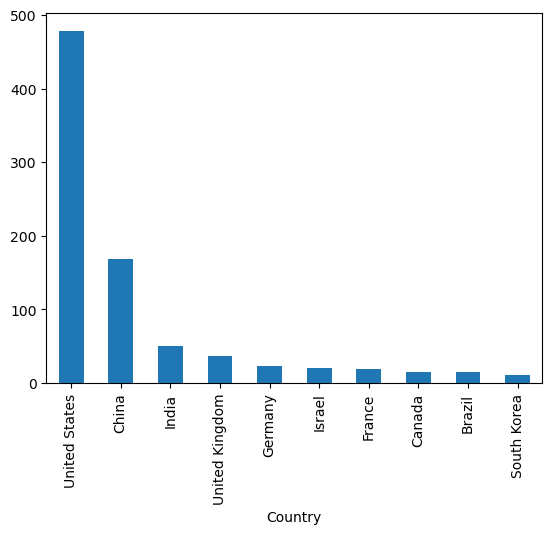

In [113]:
# plot a barplot
df.Country.value_counts().head(10).plot(kind = 'bar')

Based on the figure above, the United States have the most unicorn startup followed by China and India. This top 10 list also includes United Kingdom, Germany, Israel, France, Canada, Brazil and South Korea.

To narrow down the list, we will focused on the unicorn startups in the Southeast Asia as below:

In [114]:
# counting the top 10 country in Southeast Asia by number of unicorn startups
sea = ['Indonesia','Singapore','Thailand','Malaysia','Vietnam','Philippines']
df_sea = df[df['Country'].isin(sea)]
df_sea.Country.value_counts().head(10)

Country
Singapore      11
Indonesia       5
Philippines     2
Thailand        2
Vietnam         1
Malaysia        1
Name: count, dtype: int64

<Axes: xlabel='Country'>

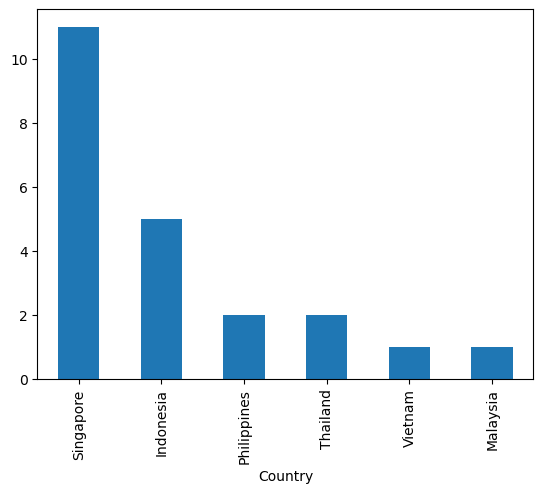

In [115]:
# plot a barplot
df_sea.Country.value_counts().head(10).plot(kind = 'bar')

Based on the figure above, Singapore have the most unicorn startup followed by Indonesia and Philippines. Malaysia and Vietnam only have 1 unicorn startup and is the lowest in Southeast Asian country.

### **2. Distribution of unicorn startups based on type of industry**

The are 15 types of industry for unicorn startups from Fintech to Consumer & retail. The list and the number of unicorn startups in those indystry are as follows: 

In [116]:
# counting the company based on type of industry
df.Industry.value_counts()

Industry
Fintech                              191
Internet software & services         167
E-commerce & direct-to-consumer      102
Artificial intelligence               73
Health                                63
Other                                 51
Supply chain logistics & delivery     51
Cybersecurity                         41
Mobile & telecommunications           37
Data management & analytics           36
Hardware                              32
Auto & transportation                 29
Edtech                                27
Consumer & retail                     23
Travel                                13
Name: count, dtype: int64

In [117]:
df.head(10)

,Company,Valuation,Date Joined,Country,City,Industry,Investor 1
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,Sequoia Capital China
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,Founders Fund
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,Khosla Ventures
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,Institutional Venture Partners
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,Sequoia Capital China
5,Instacart,39.0,2014-12-30,United States,San Francisco,Supply chain logistics & delivery,Khosla Ventures
6,Databricks,38.0,2019-02-05,United States,San Francisco,Data management & analytics,Andreessen Horowitz
7,Revolut,33.0,2018-04-26,United Kingdom,London,Fintech,index Ventures
8,Nubank,30.0,2018-03-01,Brazil,Sao Paulo,Fintech,Sequoia Capital
9,Epic Games,28.7,2018-10-26,United States,Cary,Other,Tencent Holdings


In [122]:
# group the industry based on valuation
industry_value = df.groupby(by = 'Industry').sum().sort_values(by = 'Valuation', ascending = False)
industry_value

,Company,Valuation,Date Joined,Country,City,Investor 1
Industry,,,,,,
Fintech,StripeKlarnaRevolutNubankChimeFTXCheckout.comP...,744.13,2014-01-232011-12-122018-04-262018-03-012019-0...,United StatesSwedenUnited KingdomBrazilUnited ...,San FranciscoStockholmLondonSao PauloSan Franc...,Khosla VenturesInstitutional Venture Partnersi...
Internet software & services,CanvaGrammarlyGoodLeapFigmaredditTalkdeskNotio...,483.76,2018-01-082019-10-102021-10-132020-04-302017-0...,AustraliaUnited StatesUnited StatesUnited Stat...,Surry HillsSan FranciscoRosevilleSan Francisco...,Sequoia Capital ChinaGeneral CatalystNew Enter...
Artificial intelligence,BytedanceFaireSenseTimeScale AIArgo AIGongAuto...,312.84,2017-04-072019-10-302017-07-112019-08-052019-0...,ChinaUnited StatesChinaUnited StatesUnited Sta...,BeijingSan FranciscoShanghaiSan FranciscoPitts...,Sequoia Capital ChinaKhosla VenturesStar VCAcc...
E-commerce & direct-to-consumer,XiaohongshuFanaticsSHEINgoPuffChehaoduoKavakXi...,291.10,2016-03-312012-06-062018-07-032020-10-082016-0...,ChinaUnited StatesChinaUnited StatesChinaMexic...,ShanghaiJacksonvilleShenzhenPhiladelphiaBeijin...,GGV CapitalSoftBank GroupTiger Global Manageme...
Other,SpaceXEpic GamesThrasioHEYTEANorthvoltBlack Un...,245.46,2012-12-012018-10-262020-07-152019-07-012019-0...,United StatesUnited StatesUnited StatesChinaSw...,HawthorneCaryWalpoleShenzhenStockholmLos Angel...,Founders FundTencent HoldingsUpper90Sequoia Ca...
Health,Devoted HealthBiosplice TherapeuticsTempusCari...,166.26,2018-10-162018-08-062018-03-212021-05-172015-0...,United StatesUnited StatesUnited StatesUnited ...,WalthamSan DiegoChicagoIrvingHangzhouSan Franc...,Andreessen HorowitzVickers Venture PartnersNew...
Supply chain logistics & delivery,InstacartJ&T ExpressLalamoveRappiSwiggyFlexpor...,146.29,2014-12-302021-04-072019-02-212018-08-312018-0...,United StatesIndonesiaHong KongColombiaIndiaUn...,San FranciscoJakartaCheung Sha WanBogotaBengal...,Khosla VenturesHillhouse Capital ManagementMin...
Data management & analytics,DatabricksCelonisFiveTranCollibraSambaNova Sys...,121.70,2019-02-052018-06-262020-06-302019-01-292021-0...,United StatesGermanyUnited StatesBelgiumUnited...,San FranciscoMunichOaklandBrusselsPalo AltoPal...,Andreessen HorowitzAccelMatrix PartnersIndex V...
Cybersecurity,TaniumSnykLaceworkNetskopeWizSocureArctic Wolf...,107.54,2015-03-312020-01-212021-01-072018-11-132021-0...,United StatesUnited KingdomUnited StatesUnited...,KirklandReadingSan JoseSanta ClaraTel AvivNew ...,Andreessen HorowitzBOLDstart VenturesSutter Hi...


The **Fintech** leading the list of top 10 industry with the highest total of valuation of **US$744.13 billion**.

In [ ]:
# A new data frame for highest total medals in Southeast Asia country with medals
filter_sea = ['Malaysia','Thailand','Indonesia', 'Philippines','Singapore', 'Vietnam']
df_filter_sea = df[df['country'].isin(filter_sea)]
df_country_sea = df_filter_sea.groupby('country')['total medals'].agg(['sum', 'count']).reset_index()
df_country_sea_total_medals = df_country_sea.sort_values('sum', ascending = False).head()
df_country_sea_total_medals

,country,sum,count
0,Indonesia,37,9
4,Thailand,35,11
2,Philippines,14,9
1,Malaysia,13,6
3,Singapore,5,4


For Southeast Asia countries, **Indonesia** is the in the top list with a total of **37** medals followed by **Thailand** with a total of **35** medals. **Malaysia** sit at the **4th** place with a total of **13** medals won throughout its participation in Olympic games.


In [ ]:
# To filter Malaysia
df_filter_sea = df[df['country'].isin(filter_sea)]
df_filter_sea[df_filter_sea['country']=='Malaysia']

,year,games_type,host_country,host_city,athletes,teams,competitions,country,gold,silver,bronze,total medals
82,2020,Summer,Japan,Tokyo,11420,206,339,Malaysia,0,1,1,2
200,2016,Summer,Brazil,Rio,11238,207,306,Malaysia,0,4,1,5
313,2012,Summer,Great Britain,London,10568,204,302,Malaysia,0,1,1,2
423,2008,Summer,China,Beijing,10942,204,302,Malaysia,0,1,0,1
732,1996,Summer,United States,Atlanta,10318,197,271,Malaysia,0,1,1,2
827,1992,Summer,Spain,Barcelona,9356,169,257,Malaysia,0,0,1,1


Malaysia has **6 times participation with medals won** in Olympic games from 1992 to 2020 with the highest total medals won at Rio with 5 medals.

## **Visualizations**

### **Boxplot of top 10 countries with highest medals**

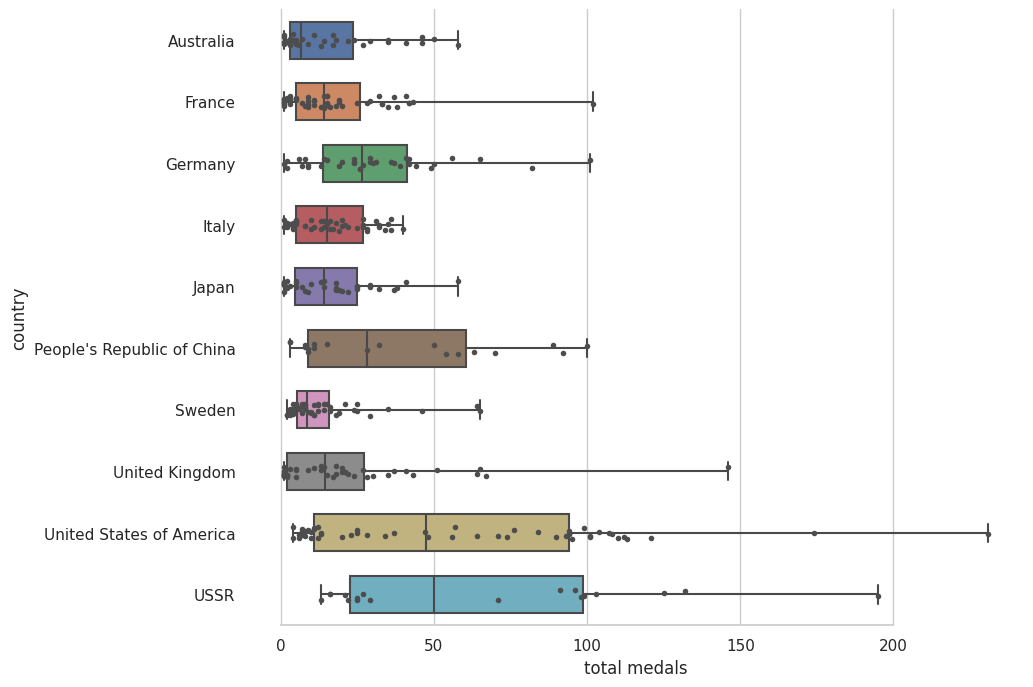

In [ ]:
# New data frame for top country with medals
filter = ['United States of America','USSR','Germany', 'United Kingdom','France', 'Italy', "People's Republic of China", 'Sweden','Australia', 'Japan']
df_filter_top_country = df[df['country'].isin(filter)]

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 8))

sns.boxplot(
    df_filter_top_country, x="total medals", y="country",
    whis=[0, 100], width=.6
)

# Add in points to show each observation
sns.stripplot(df_filter_top_country, x="total medals", y="country", size=4, color=".3")

# Tweak the visual presentation
#ax.xaxis.grid(True)
#ax.set(ylabel="")
sns.despine(trim=True, left=True)

The boxplot shows the distribution of total medals won by each of the top 10 countries. Most of the country have positively skewed distribution in which the right tail is longer and the box being closer to the left side of the plot. This indicates that the medals won by those countries is mostly in average of total medals won by the country and a few of higher total medals won which shows a tail of hihger values on the right side. We can see that most of the total medals won by each countries is concentrated below 100.

### **Boxplot of top 10 countries with highest gold medals**

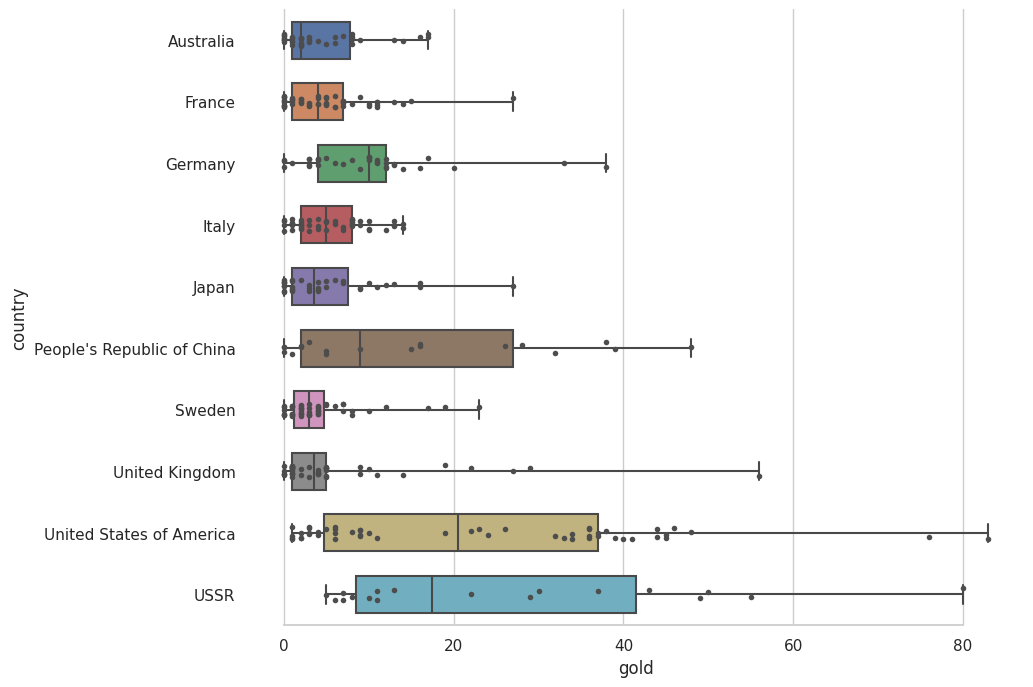

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 8))

sns.boxplot(
    df_filter_top_country, x="gold", y="country",
    whis=[0, 100], width=.6
)

# Add in points to show each observation
sns.stripplot(df_filter_top_country, x="gold", y="country", size=4, color=".3")

# Tweak the visual presentation

sns.despine(trim=True, left=True)

The boxplot shows the distribution of total gold medals won by each of the top 10 countries. Most of the country have positively skewed distribution in which the right tail is longer and the box being closer to the left side of the plot. This indicates that the gold medals won by those countries is mostly in average of total gold medals won by the country and a few of higher total gold medals won which shows a tail of hihger values on the right side. Though for United States of America, the median is more shifted to the right and the right tail is shorter compared from the previous total medals boxplot.

### **Boxplot comparison of Winter and Summer Olympic Games**

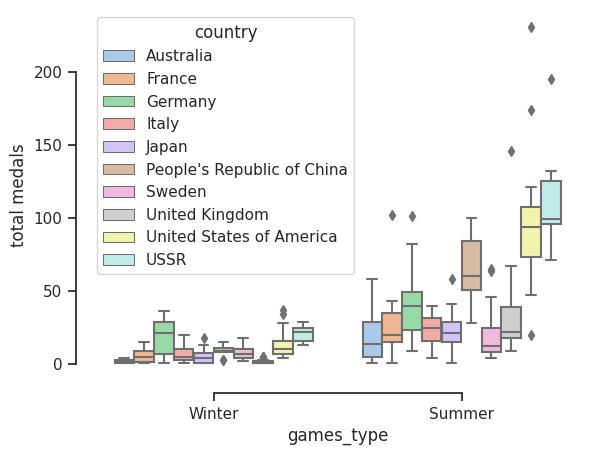

In [ ]:
sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="games_type", y="total medals",
            hue="country",
            data=df_filter_top_country)
sns.despine(offset=10, trim=True)

The boxplot shows that when the Olympic games is divided by game type of Winter and Summer, the top 10 countries with highest medals is changed. As for Summer games, although United States of America have the total medals, the most constantly winning through the Summer game with average medals won is USSR based on the concentrated box values that is higher than the other countries.

For the Winter games, it shows that the Germany and USSR have a higher concentrated box values with median of their total medals won is higher than United States of America.

### **Boxplot comparison of gold medals of Winter and Summer Olympic Games**

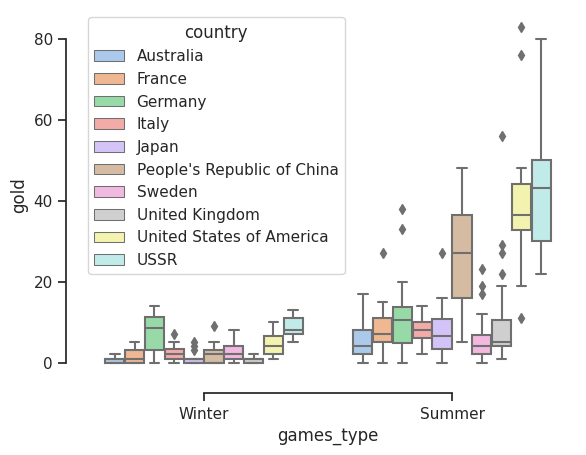

In [ ]:
sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="games_type", y="gold",
            hue="country",
            data=df_filter_top_country)
sns.despine(offset=10, trim=True)

For the distribution of boxplot in Summer games, it shows that USSR have a higher box concentration and a longer right tail although United States of America have the highest value of total gold medals. It also shows that the top 3 countries with the highest distribution of gold medals in the Summer games are USSR, United States of America and followed by People's Republic of China.

As for the Winter games, it shows that both USSR and Germany topping the list as the boxplot concentrated higher and also the median to the right followed by United States of America.

### **Line plot of total medals of Southeast Asia**

<Axes: xlabel='year', ylabel='total medals'>

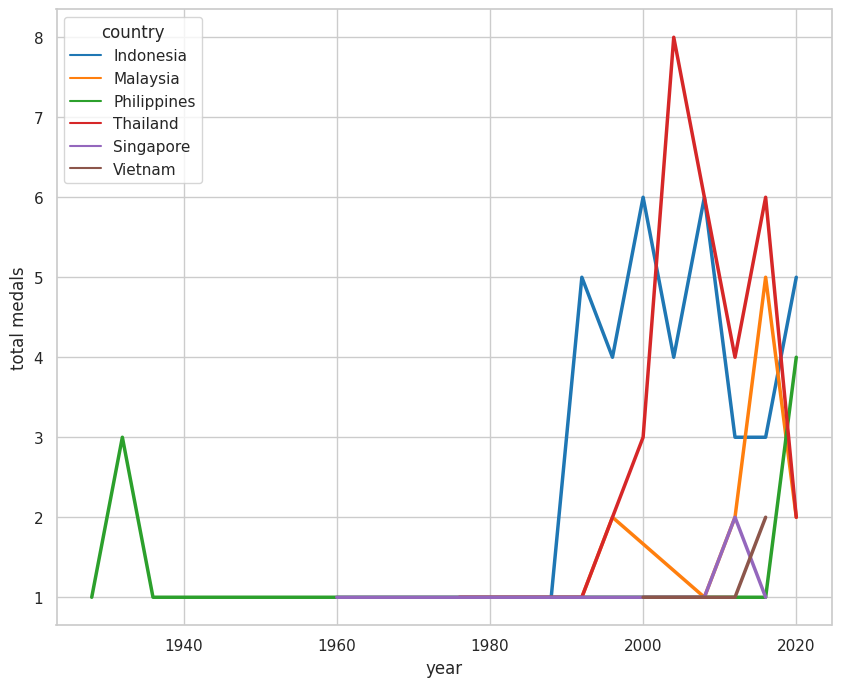

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 8))

# Plot the responses for different events and regions
sns.lineplot(data=df_filter_sea, x="year", y="total medals",
             hue="country",
             palette="tab10", linewidth=2.5, errorbar=None)

The plot shows that the first Southeast Asia country to ever win a medal in the Olympic games is Philippine that is in the year of 1928 followed by Singapore in 1960. Most of the other Southeast Asia country started winning a medals in the 90s with Malaysia in the year 1992. The highest medals won by Southeast Asia is Thailand in 2004 with a total of 8 medals.

### **Line plot of total medals of Malaysia**

<Axes: xlabel='year', ylabel='total medals'>

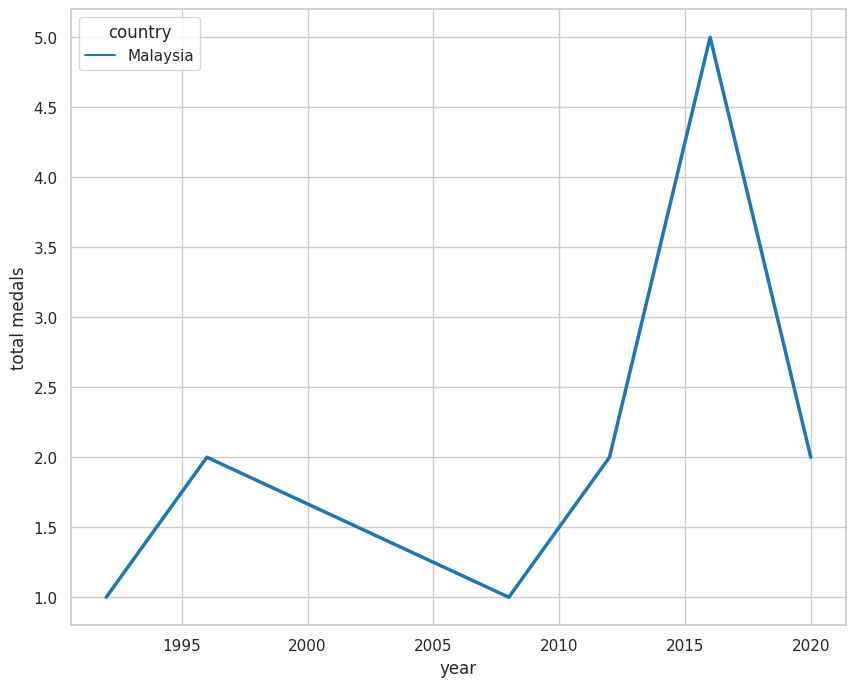

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 8))

# Plot the responses for different events and regions
sns.lineplot(data=df_filter_sea[df_filter_sea['country']=='Malaysia'], x="year", y="total medals",
             hue="country",
             palette="tab10", linewidth=2.5, errorbar=None)

As for Malaysia, the highest total medals won by our country is in the 2016 Rio Olympic games with a total of 5 medals. 4 silver medals contributed from Badminton which contributed 3 silver diving 1 medal. The other medal which is 1 bronze medal contributed from cycling.

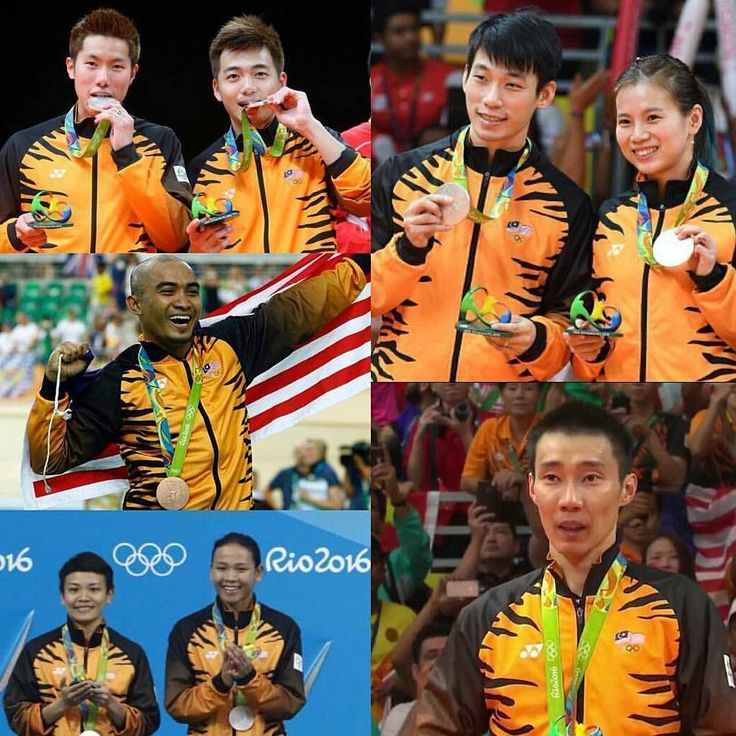

In [ ]:
image_path = '/content/drive/MyDrive/MSc SDA/Sem 1_2023_2024/STQD6014/Project/Project_2/Winners.jpg'
Image(filename=image_path)

# **Conclusion**

The conclusion of this explanatory data analysis of Olympic games based on the problem statement mention in the early section, we can conclude that:

* United States of America is the country with the most medals won throughout the Olympic games from 1896 to 2022 with total medals of 2,968 with 52 times participation. Although, if we look by games type of Summer Olympic games, USSR comes close in total medals won and for Winter Olympic games, Germany and USSR is leading the United States of America by total medals won concentration.

* For Southeast Asia countries participation in Olympic games, it shows that the total medals won is increasing throughout the year of participation with Thailand leading by total of 8 medals. As for Malaysia, we can aim for more medals in next 2024 Olympic games focusing on games like Badminton, Diving and Cycling as it is the most contributing games for Malaysia.